# TD3 - Machine Learning for NLP
## Michele Mogavero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            id    qid1    qid2  \
237921  237921    9732   79801   
181001  181001  277377  277378   
294691  294691  150129   93109   
104145  104145  171986  171987   
357893  357893  487310  487311   

                                                question1  \
237921                                   sex relationship   
181001                            inspiring start stories   
294691                                  digital marketing   
104145                                 grow facebook page   
357893  suppose host sends tcp segments back back host...   

                                                question2  is_duplicate  
237921                         sex important relationship             1  
181001                              inspirational stories             0  
294691                      unique ways digital marketing             1  
104145                            followers facebook page             1  
357893  suppose host sends tcp segments back back host... 

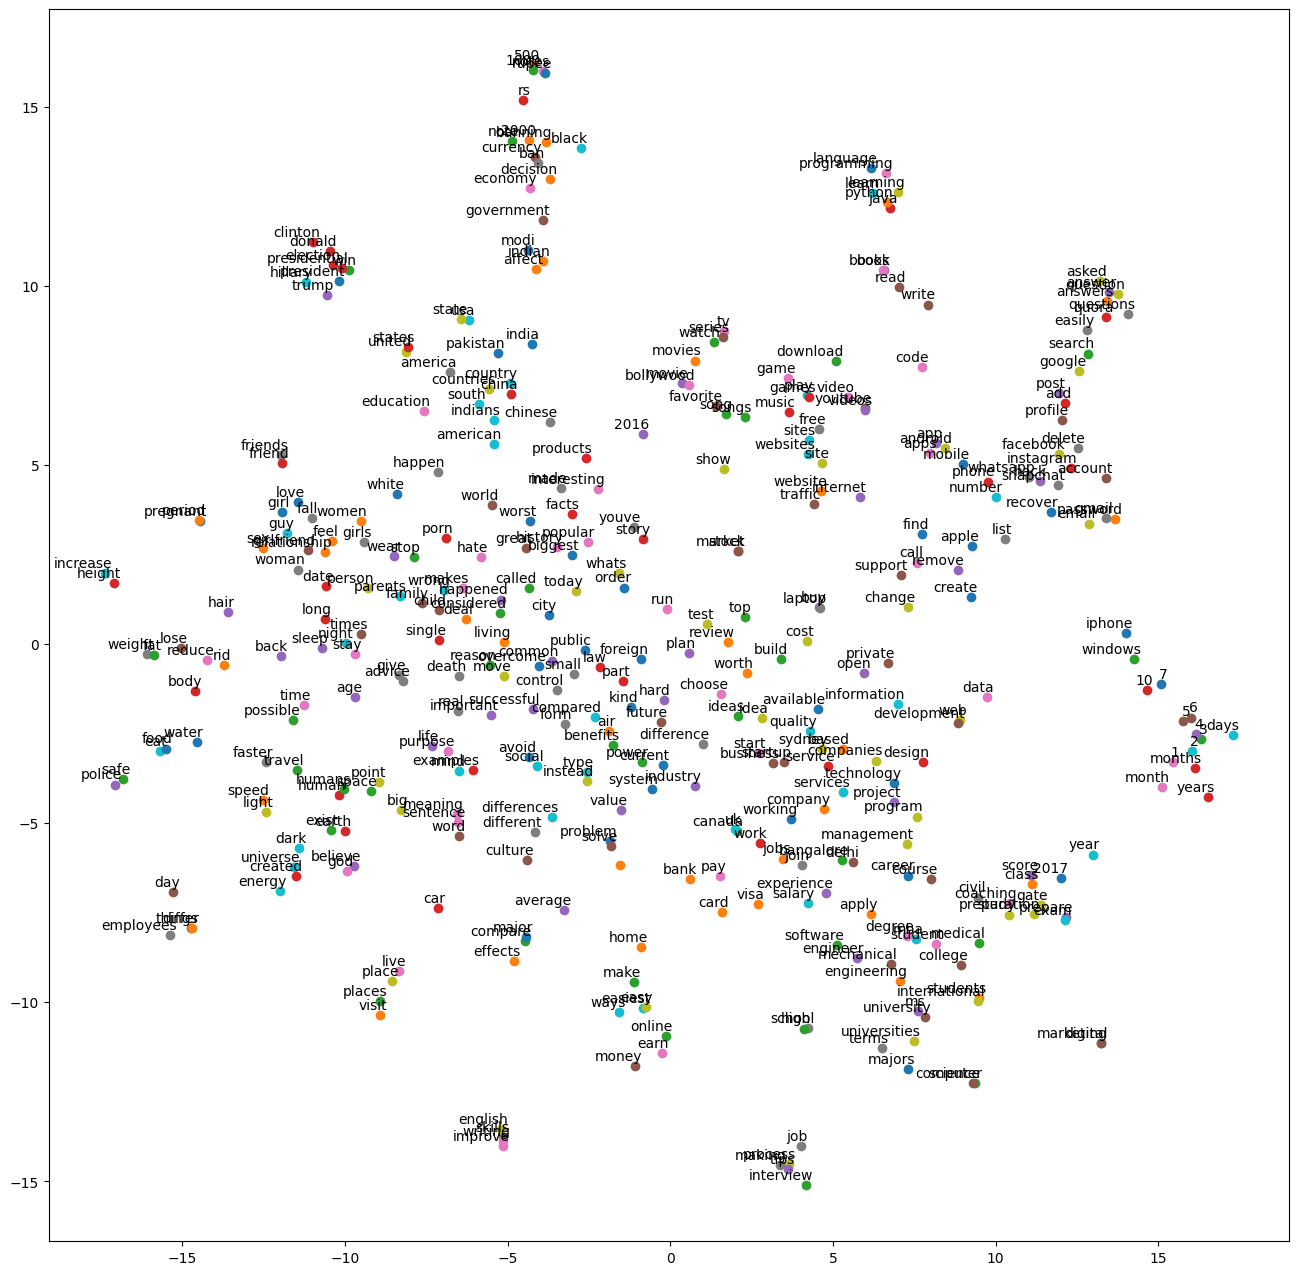

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
import nltk
nltk.download('stopwords')
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#matplotlib inline

data = pd.read_csv('train.csv').sample(50000, random_state=23)

STOP_WORDS = nltk.corpus.stopwords.words()


def clean_sentence(val):
    # Remove chars that are not letters or numbers, downcase, then remove stop words
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")

    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)

    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    # Drop nans, then apply 'clean_sentence' function to question1 and 2
    data = data.dropna(how="any")

    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)

    return data

data = clean_dataframe(data)
data.head(5)


def build_corpus(data):
    # Creates a list of lists containing words from each sentence
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].items():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)

    return corpus


print(data.head(5))

corpus = build_corpus(data)
corpus[0:2]


model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)
model.wv['trump']

vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])



def tsne_plot(model):
    # Creates and TSNE model and plots it
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])



    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

In [8]:
import pickle

def loadCNN():
	file = open("CNNArticles",'rb')
	articles = pickle.load(file)
	file = open("CNNGold",'rb')
	abstracts = pickle.load(file)

	articlesCl = []
	for article in articles:
		articlesCl.append(article.replace("”", "").rstrip("\n"))
	articles = articlesCl

	articlesCl = []
	for article in abstracts:
		articlesCl.append(article.replace("”", "").rstrip("\n"))
	abstracts = articlesCl

	return articles, abstracts

articles, abstracts = loadCNN()

print("ARTICLE=",articles[0])
print("SUMMARY=",abstracts[0])


ARTICLE= turkey has blocked access to twitter and youtube after they refused a request to remove pictures of a prosecutor held during an armed siege last week . a turkish court imposed the blocks because images of the deadly siege were being shared on social media and ` deeply upset ' the wife and children of mehmet selim kiraz , the hostage who was killed . the 46-year-old turkish prosecutor died in hospital when members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage . the dhkp-c is considered a terrorist group by turkey , the european union and us . a turkish court has blocked access to twitter and youtube after they refused a request to remove pictures of prosecutor mehmet selim kiraz held during an armed siege last week grief : the family of mehmet selim kiraz grieve over his coffin during his funeral at eyup sultan mosque in istanbul , turkey . he died in hospital after he was taken hostage by the far-left organisation tw

### Information retrieval


In [9]:
import pickle
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Define a function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(f"[{string.punctuation}]", " ", text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Preprocess the articles and summaries
preprocessed_articles = [preprocess_text(article) for article in articles]
preprocessed_summaries = [preprocess_text(summary) for summary in abstracts]

# Example: Print the preprocessed text of the first article and summary
print("Preprocessed ARTICLE:", preprocessed_articles[0])
print("Preprocessed SUMMARY:", preprocessed_summaries[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessed ARTICLE: ['turkey', 'blocked', 'access', 'twitter', 'youtube', 'refused', 'request', 'remove', 'pictures', 'prosecutor', 'held', 'armed', 'siege', 'last', 'week', 'turkish', 'court', 'imposed', 'blocks', 'images', 'deadly', 'siege', 'shared', 'social', 'media', 'deeply', 'upset', 'wife', 'children', 'mehmet', 'selim', 'kiraz', 'hostage', 'killed', '46', 'year', 'old', 'turkish', 'prosecutor', 'died', 'hospital', 'members', 'revolutionary', 'people', 'liberation', 'party', 'front', 'dhkp', 'c', 'stormed', 'courthouse', 'took', 'hostage', 'dhkp', 'c', 'considered', 'terrorist', 'group', 'turkey', 'european', 'union', 'us', 'turkish', 'court', 'blocked', 'access', 'twitter', 'youtube', 'refused', 'request', 'remove', 'pictures', 'prosecutor', 'mehmet', 'selim', 'kiraz', 'held', 'armed', 'siege', 'last', 'week', 'grief', 'family', 'mehmet', 'selim', 'kiraz', 'grieve', 'coffin', 'funeral', 'eyup', 'sultan', 'mosque', 'istanbul', 'turkey', 'died', 'hospital', 'taken', 'hostage',

In [10]:
# Create an inverted index for articles
def create_inverted_index(articles):
    inverted_index = {}
    for idx, article in enumerate(articles):
        tokens = preprocess_text(article)  # Use the preprocess_text function from the previous example
        for token in tokens:
            if token in inverted_index:
                inverted_index[token].append(idx)
            else:
                inverted_index[token] = [idx]
    return inverted_index

# Create the inverted index for the preprocessed articles
inverted_index = create_inverted_index(articles)

# Example: Retrieve documents related to a query using the inverted index
def retrieve_documents_from_index(query, inverted_index, articles):
    query_tokens = preprocess_text(query)
    related_documents = set()
    for token in query_tokens:
        if token in inverted_index:
            related_documents.update(inverted_index[token])
    # Sort the related documents by relevance (you can implement a ranking model)
    related_documents = list(related_documents)
    related_documents.sort()
    # Return the related articles
    return [articles[idx] for idx in related_documents]

# Example usage
query = "turkish court blocks social media"
retrieved_articles = retrieve_documents_from_index(query, inverted_index, articles)

# Print the retrieved articles
for idx, article in enumerate(retrieved_articles):
    print(f"Related Article {idx + 1}:\n{article}\n")

Related Article 1:
turkey has blocked access to twitter and youtube after they refused a request to remove pictures of a prosecutor held during an armed siege last week . a turkish court imposed the blocks because images of the deadly siege were being shared on social media and ` deeply upset ' the wife and children of mehmet selim kiraz , the hostage who was killed . the 46-year-old turkish prosecutor died in hospital when members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage . the dhkp-c is considered a terrorist group by turkey , the european union and us . a turkish court has blocked access to twitter and youtube after they refused a request to remove pictures of prosecutor mehmet selim kiraz held during an armed siege last week grief : the family of mehmet selim kiraz grieve over his coffin during his funeral at eyup sultan mosque in istanbul , turkey . he died in hospital after he was taken hostage by the far-left organ

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define a TF-IDF vectorizer for articles
def create_tfidf_vectorizer(articles):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(articles)
    return vectorizer, tfidf_matrix

# Create the TF-IDF vectorizer for articles
tfidf_vectorizer, tfidf_matrix = create_tfidf_vectorizer(articles)

# Define a function to retrieve documents using the VSM model
def retrieve_documents_vsm(query, tfidf_vectorizer, tfidf_matrix, articles):
    # Preprocess and vectorize the query
    query_vector = tfidf_vectorizer.transform([query])
    # Calculate cosine similarity between the query and all articles
    similarities = cosine_similarity(query_vector, tfidf_matrix)
    # Get the ranked list of documents based on similarity
    ranked_documents = [(article, score) for article, score in zip(articles, similarities[0])]
    # Sort by score in descending order
    ranked_documents.sort(key=lambda x: x[1], reverse=True)
    return ranked_documents

# Example usage
query = "turkish court blocks social media"
results = retrieve_documents_vsm(query, tfidf_vectorizer, tfidf_matrix, articles)

# Display the top-ranked documents and their scores
for idx, (doc, score) in enumerate(results[:5]):  # Display the top 5 documents
    print(f"Rank {idx + 1} - Score: {score}")
    print(doc)
    print("\n")

Rank 1 - Score: 0.3280288863134091
turkey has lifted a block on social media sites in the country after twitter , facebook and youtube agreed to remove chilling images of a prosecutor being held at gunpoint by left wing extremists . a turkish court imposed the blocks yesterday because photographs of the deadly siege in which mehmet selim kiraz was killed were being widely shared on social media . the 46-year-old turkish prosecutor died in hospital when two members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage - uploading the photographs of kiraz with a gun pointed at his head to social media in the process . turkey initially demanded domestic newspapers stop running the ` terrorist propaganda ' images , before going on to block access to twitter , facebook and youtube yesterday when requests to remove the photographs were ignored . chilling : mehmet selim kiraz died after two members of the revolutionary people 's liberation 

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to preprocess a user's query
def preprocess_query(query):
    # Lowercase the query
    query = query.lower()
    # Remove punctuation and special characters
    query = re.sub(f"[{string.punctuation}]", " ", query)
    # Tokenize the query
    tokens = word_tokenize(query)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens to form the preprocessed query
    preprocessed_query = " ".join(tokens)
    return preprocessed_query


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Define a function to rank documents based on cosine similarity
def rank_documents(query_vector, tfidf_matrix):
    # Calculate cosine similarity between the query and all documents
    similarities = cosine_similarity(query_vector, tfidf_matrix)
    # Get the relevance scores for each document
    relevance_scores = similarities[0]
    return relevance_scores

# Example usage
user_query = "Turkish court blocks social media over siege images"
preprocessed_user_query = preprocess_query(user_query)  # Preprocess the user's query
# Preprocess and vectorize the user's query
query_vector = tfidf_vectorizer.transform([preprocessed_user_query])
# Calculate relevance scores for all documents
relevance_scores = rank_documents(query_vector, tfidf_matrix)
# Pair each article with its relevance score
article_score_pairs = list(zip(articles, relevance_scores))
# Sort documents by relevance (highest score first)
article_score_pairs.sort(key=lambda x: x[1], reverse=True)
# Display the top-ranked documents and their scores
top_k = 5  # Number of top documents to display
for idx, (doc, score) in enumerate(article_score_pairs[:top_k]):
    print(f"Rank {idx + 1} - Score: {score}")
    print(doc)
    print("\n")


Rank 1 - Score: 0.3673600693793425
turkey has lifted a block on social media sites in the country after twitter , facebook and youtube agreed to remove chilling images of a prosecutor being held at gunpoint by left wing extremists . a turkish court imposed the blocks yesterday because photographs of the deadly siege in which mehmet selim kiraz was killed were being widely shared on social media . the 46-year-old turkish prosecutor died in hospital when two members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage - uploading the photographs of kiraz with a gun pointed at his head to social media in the process . turkey initially demanded domestic newspapers stop running the ` terrorist propaganda ' images , before going on to block access to twitter , facebook and youtube yesterday when requests to remove the photographs were ignored . chilling : mehmet selim kiraz died after two members of the revolutionary people 's liberation 

In [14]:
# Sort documents by relevance (highest score first)
article_score_pairs.sort(key=lambda x: x[1], reverse=True)
# Display the top-ranked documents and their scores
top_k = 5  # Number of top documents to display
for idx, (doc, score) in enumerate(article_score_pairs[:top_k]):
    print(f"Rank {idx + 1} - Score: {score}")
    print(doc)
    print("\n")


Rank 1 - Score: 0.3673600693793425
turkey has lifted a block on social media sites in the country after twitter , facebook and youtube agreed to remove chilling images of a prosecutor being held at gunpoint by left wing extremists . a turkish court imposed the blocks yesterday because photographs of the deadly siege in which mehmet selim kiraz was killed were being widely shared on social media . the 46-year-old turkish prosecutor died in hospital when two members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage - uploading the photographs of kiraz with a gun pointed at his head to social media in the process . turkey initially demanded domestic newspapers stop running the ` terrorist propaganda ' images , before going on to block access to twitter , facebook and youtube yesterday when requests to remove the photographs were ignored . chilling : mehmet selim kiraz died after two members of the revolutionary people 's liberation 